In [1]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import skrf as rf
import numpy as np
import re
from PIL import Image
import GSx
import DammannY as dt
import RawDFgenerator
from tqdm import tqdm

In [2]:
#Parâmetros
wavelength = 1064e-9  # 1064 nm
z = 380e-6           # 380 μm
dx = 520e-9          # pixel pitch
NA = 0.65            # Abertura numérica
num_iter = 60


#Geração mapa de fase polarização x
print("Gerando mapa de fase para Polarização X (Holograma)")
target_image = GSx.load_and_preprocess_image('ufabc.png', target_size=(450, 450))
phase_map_x, _ = GSx.gerchberg_saxton_angular_spectrum(
    target_image, wavelength, z, dx, NA, num_iter)

print("Mapa de fase X gerado\n")

#Geração mapa de fase polarização y
print("Gerando mapa de fase para Polarização Y (Dammann)")
phase_map_y, metrics_y, _ = dt.generate_dammann_phase_map(
    P=dx,
    wavelength=wavelength,
    supercell_pixels=45,
    n_supercells=10,
    iters_gs=400)

print("Mapa de fase Y gerado")
print("\nDimensões dos mapas de fase:")
print(f"Mapa X: {phase_map_x.shape}")
print(f"Mapa Y: {phase_map_y.shape}")


Gerando mapa de fase para Polarização X (Holograma)
Iteração 10/60, Correlação: 0.9462
Iteração 20/60, Correlação: 0.9540
Iteração 30/60, Correlação: 0.9571
Iteração 40/60, Correlação: 0.9588
Iteração 50/60, Correlação: 0.9598
Iteração 60/60, Correlação: 0.9605
Mapa de fase X gerado

Gerando mapa de fase para Polarização Y (Dammann)
---- Resumo Dammann ----
Supercell: 45x45, metasurface: 450x450
Iterações GS: 400
Ordens propagantes M = 1513
DE ≈ 0.999026
RMSE uniformidade = 0.070873
Mapa de fase Y gerado

Dimensões dos mapas de fase:
Mapa X: (450, 450)
Mapa Y: (450, 450)


In [13]:
caminho = r'C:\Users\caval_5gfl5hy\OneDrive\Área de Trabalho\bib5\Nova pasta (4)AAA'
df = RawDFgenerator.find_file(caminho)


Buscando...
Lendo arquivo: Teste_Nanopilar_1.ts (ID:1)...
Lendo arquivo: Teste_Nanopilar_10.ts (ID:10)...
Lendo arquivo: Teste_Nanopilar_100.ts (ID:100)...
Lendo arquivo: Teste_Nanopilar_101.ts (ID:101)...
Lendo arquivo: Teste_Nanopilar_102.ts (ID:102)...
Lendo arquivo: Teste_Nanopilar_103.ts (ID:103)...
Lendo arquivo: Teste_Nanopilar_104.ts (ID:104)...
Lendo arquivo: Teste_Nanopilar_105.ts (ID:105)...
Lendo arquivo: Teste_Nanopilar_106.ts (ID:106)...
Lendo arquivo: Teste_Nanopilar_107.ts (ID:107)...
Lendo arquivo: Teste_Nanopilar_108.ts (ID:108)...
Lendo arquivo: Teste_Nanopilar_109.ts (ID:109)...
Lendo arquivo: Teste_Nanopilar_11.ts (ID:11)...
Lendo arquivo: Teste_Nanopilar_110.ts (ID:110)...
Lendo arquivo: Teste_Nanopilar_111.ts (ID:111)...
Lendo arquivo: Teste_Nanopilar_112.ts (ID:112)...
Lendo arquivo: Teste_Nanopilar_113.ts (ID:113)...
Lendo arquivo: Teste_Nanopilar_114.ts (ID:114)...
Lendo arquivo: Teste_Nanopilar_115.ts (ID:115)...
Lendo arquivo: Teste_Nanopilar_116.ts (ID:116)

Lendo arquivo: Teste_Nanopilar_249.ts (ID:249)...
Lendo arquivo: Teste_Nanopilar_25.ts (ID:25)...
Lendo arquivo: Teste_Nanopilar_250.ts (ID:250)...
Lendo arquivo: Teste_Nanopilar_251.ts (ID:251)...
Lendo arquivo: Teste_Nanopilar_252.ts (ID:252)...
Lendo arquivo: Teste_Nanopilar_253.ts (ID:253)...
Lendo arquivo: Teste_Nanopilar_254.ts (ID:254)...
Lendo arquivo: Teste_Nanopilar_255.ts (ID:255)...
Lendo arquivo: Teste_Nanopilar_256.ts (ID:256)...
Lendo arquivo: Teste_Nanopilar_257.ts (ID:257)...
Lendo arquivo: Teste_Nanopilar_258.ts (ID:258)...
Lendo arquivo: Teste_Nanopilar_259.ts (ID:259)...
Lendo arquivo: Teste_Nanopilar_26.ts (ID:26)...
Lendo arquivo: Teste_Nanopilar_260.ts (ID:260)...
Lendo arquivo: Teste_Nanopilar_261.ts (ID:261)...
Lendo arquivo: Teste_Nanopilar_262.ts (ID:262)...
Lendo arquivo: Teste_Nanopilar_263.ts (ID:263)...
Lendo arquivo: Teste_Nanopilar_264.ts (ID:264)...
Lendo arquivo: Teste_Nanopilar_265.ts (ID:265)...
Lendo arquivo: Teste_Nanopilar_266.ts (ID:266)...
Lend

Lendo arquivo: Teste_Nanopilar_398.ts (ID:398)...
Lendo arquivo: Teste_Nanopilar_399.ts (ID:399)...
Lendo arquivo: Teste_Nanopilar_4.ts (ID:4)...
Lendo arquivo: Teste_Nanopilar_40.ts (ID:40)...
Lendo arquivo: Teste_Nanopilar_400.ts (ID:400)...
Lendo arquivo: Teste_Nanopilar_401.ts (ID:401)...
Lendo arquivo: Teste_Nanopilar_402.ts (ID:402)...
Lendo arquivo: Teste_Nanopilar_403.ts (ID:403)...
Lendo arquivo: Teste_Nanopilar_404.ts (ID:404)...
Lendo arquivo: Teste_Nanopilar_405.ts (ID:405)...
Lendo arquivo: Teste_Nanopilar_406.ts (ID:406)...
Lendo arquivo: Teste_Nanopilar_407.ts (ID:407)...
Lendo arquivo: Teste_Nanopilar_408.ts (ID:408)...
Lendo arquivo: Teste_Nanopilar_409.ts (ID:409)...
Lendo arquivo: Teste_Nanopilar_41.ts (ID:41)...
Lendo arquivo: Teste_Nanopilar_410.ts (ID:410)...
Lendo arquivo: Teste_Nanopilar_411.ts (ID:411)...
Lendo arquivo: Teste_Nanopilar_412.ts (ID:412)...
Lendo arquivo: Teste_Nanopilar_413.ts (ID:413)...
Lendo arquivo: Teste_Nanopilar_414.ts (ID:414)...
Lendo ar

Lendo arquivo: Teste_Nanopilar_547.ts (ID:547)...
Lendo arquivo: Teste_Nanopilar_548.ts (ID:548)...
Lendo arquivo: Teste_Nanopilar_549.ts (ID:549)...
Lendo arquivo: Teste_Nanopilar_55.ts (ID:55)...
Lendo arquivo: Teste_Nanopilar_550.ts (ID:550)...
Lendo arquivo: Teste_Nanopilar_551.ts (ID:551)...
Lendo arquivo: Teste_Nanopilar_552.ts (ID:552)...
Lendo arquivo: Teste_Nanopilar_553.ts (ID:553)...
Lendo arquivo: Teste_Nanopilar_554.ts (ID:554)...
Lendo arquivo: Teste_Nanopilar_555.ts (ID:555)...
Lendo arquivo: Teste_Nanopilar_556.ts (ID:556)...
Lendo arquivo: Teste_Nanopilar_557.ts (ID:557)...
Lendo arquivo: Teste_Nanopilar_558.ts (ID:558)...
Lendo arquivo: Teste_Nanopilar_559.ts (ID:559)...
Lendo arquivo: Teste_Nanopilar_56.ts (ID:56)...
Lendo arquivo: Teste_Nanopilar_560.ts (ID:560)...
Lendo arquivo: Teste_Nanopilar_561.ts (ID:561)...
Lendo arquivo: Teste_Nanopilar_562.ts (ID:562)...
Lendo arquivo: Teste_Nanopilar_563.ts (ID:563)...
Lendo arquivo: Teste_Nanopilar_564.ts (ID:564)...
Lend

Lendo arquivo: Teste_Nanopilar_696.ts (ID:696)...
Lendo arquivo: Teste_Nanopilar_697.ts (ID:697)...
Lendo arquivo: Teste_Nanopilar_698.ts (ID:698)...
Lendo arquivo: Teste_Nanopilar_699.ts (ID:699)...
Lendo arquivo: Teste_Nanopilar_7.ts (ID:7)...
Lendo arquivo: Teste_Nanopilar_70.ts (ID:70)...
Lendo arquivo: Teste_Nanopilar_700.ts (ID:700)...
Lendo arquivo: Teste_Nanopilar_701.ts (ID:701)...
Lendo arquivo: Teste_Nanopilar_702.ts (ID:702)...
Lendo arquivo: Teste_Nanopilar_703.ts (ID:703)...
Lendo arquivo: Teste_Nanopilar_704.ts (ID:704)...
Lendo arquivo: Teste_Nanopilar_705.ts (ID:705)...
Lendo arquivo: Teste_Nanopilar_706.ts (ID:706)...
Lendo arquivo: Teste_Nanopilar_707.ts (ID:707)...
Lendo arquivo: Teste_Nanopilar_708.ts (ID:708)...
Lendo arquivo: Teste_Nanopilar_709.ts (ID:709)...
Lendo arquivo: Teste_Nanopilar_71.ts (ID:71)...
Lendo arquivo: Teste_Nanopilar_710.ts (ID:710)...
Lendo arquivo: Teste_Nanopilar_711.ts (ID:711)...
Lendo arquivo: Teste_Nanopilar_712.ts (ID:712)...
Lendo ar

In [14]:
df_filt1064nm = df.query('frequencia_ghz == 281760.0') # 281760.0 frequencia padrão
df2 = df_filt1064nm.drop(['arquivo'], axis =1)

inicio = 70
fim = 200
passo = 5

valores = np.arange(inicio, fim + 1, passo)

print(f"Valores base: {valores}")
num_valores = len(valores)
print(f"Número de valores únicos: {num_valores}")
print(f"Tamanho total da matriz será: {num_valores} x {num_valores} = {num_valores**2}")

coluna1 = np.repeat(valores, repeats=num_valores)

coluna2 = np.tile(valores, reps=num_valores)

matriz = np.column_stack((coluna1, coluna2))

df3 = df2.sort_values(by='id_nanopilar')
df3['L_x'] = matriz[:, 0]
df3['L_y'] = matriz[:, 1]

df3

Valores base: [ 70  75  80  85  90  95 100 105 110 115 120 125 130 135 140 145 150 155
 160 165 170 175 180 185 190 195 200]
Número de valores únicos: 27
Tamanho total da matriz será: 27 x 27 = 729


,id_nanopilar,frequencia_hz,frequencia_ghz,S11_real,S11_imag,S12_real,S12_imag,S13_real,S13_imag,S14_real,...,S41_real,S41_imag,S42_real,S42_imag,S43_real,S43_imag,S44_real,S44_imag,L_x,L_y
600,1,2.817600e+14,281760.0,0.108544,0.108597,-0.000118,-0.000257,-0.986269,0.059449,-0.000140,...,-0.000207,-0.000124,-0.986154,0.059968,0.000180,-0.000400,-0.095212,0.120589,70,70
111711,2,2.817600e+14,281760.0,0.114871,0.087781,0.000644,-0.000096,-0.983273,0.109249,-0.000113,...,0.000148,-0.000226,-0.985590,0.078560,-0.000486,-0.000055,-0.093720,0.117261,70,75
222822,3,2.817600e+14,281760.0,0.121956,0.062757,0.000403,0.000268,-0.976195,0.165315,-0.000027,...,-0.000085,-0.000222,-0.983954,0.095687,-0.000362,0.000441,-0.097006,0.114334,70,80
333933,4,2.817600e+14,281760.0,0.120394,0.034986,0.000650,-0.000193,-0.965589,0.228754,-0.000056,...,0.000006,-0.000186,-0.982700,0.113139,-0.000779,0.000111,-0.093067,0.111880,70,85
445044,5,2.817600e+14,281760.0,0.114315,0.001273,-0.000208,-0.000211,-0.946008,0.301895,-0.000056,...,0.000016,0.000382,-0.981560,0.132136,0.000373,-0.000227,-0.091481,0.105659,70,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696295,725,2.817600e+14,281760.0,-0.160343,-0.211308,-0.000589,-0.000193,-0.936445,0.215144,0.000155,...,0.000143,0.000628,-0.812916,0.249245,-0.000184,-0.000575,0.152811,-0.482939,200,180
697296,726,2.817600e+14,281760.0,-0.209658,-0.238233,0.000616,0.000184,-0.895266,0.301872,-0.000565,...,-0.000534,-0.000567,-0.800556,0.391039,0.000164,0.000533,-0.003749,-0.443926,200,185
698297,727,2.817600e+14,281760.0,-0.266881,-0.257594,0.000295,-0.000316,-0.843078,0.380513,-0.000218,...,-0.000199,-0.000059,-0.775215,0.441999,-0.000254,0.000032,-0.053638,-0.439065,200,190
699298,728,2.817600e+14,281760.0,-0.323218,-0.265777,-0.000625,-0.000096,-0.784840,0.448895,0.000575,...,0.000526,0.000490,-0.747379,0.479136,-0.000558,-0.000449,-0.092219,-0.442293,200,195


In [15]:
cols1 = [
    'id_nanopilar', 
    'L_x', 
    'L_y', 
    'frequencia_ghz',
    'S13_real', 
    'S13_imag', 
    'S24_real', 
    'S24_imag'
]
df4 = df3[cols1].copy()
df4

,id_nanopilar,L_x,L_y,frequencia_ghz,S13_real,S13_imag,S24_real,S24_imag
600,1,70,70,281760.0,-0.986269,0.059449,-0.986326,0.059732
111711,2,70,75,281760.0,-0.983273,0.109249,-0.984355,0.078128
222822,3,70,80,281760.0,-0.976195,0.165315,-0.984379,0.095697
333933,4,70,85,281760.0,-0.965589,0.228754,-0.982529,0.113116
445044,5,70,90,281760.0,-0.946008,0.301895,-0.981038,0.132359
...,...,...,...,...,...,...,...,...
696295,725,200,180,281760.0,-0.936445,0.215144,-0.813052,0.249142
697296,726,200,185,281760.0,-0.895266,0.301872,-0.800524,0.391005
698297,727,200,190,281760.0,-0.843078,0.380513,-0.775226,0.442001
699298,728,200,195,281760.0,-0.784840,0.448895,-0.747360,0.479141


In [16]:
df4['S_complex_TE'] = df4['S13_real'] + 1j * df4['S13_imag']
df4['S_complex_TM'] = df4['S24_real'] + 1j * df4['S24_imag']

cols2 = ['S13_real', 
    'S13_imag', 
    'S24_real', 
    'S24_imag']
df5 = df4.drop(columns = cols2).copy()
df5.to_csv('df5.csv', index=False)

In [17]:
print("Carregando a biblioteca de meta-átomos...")
df5 = pd.read_csv('df5.csv')
df5

Carregando a biblioteca de meta-átomos...


,id_nanopilar,L_x,L_y,frequencia_ghz,S_complex_TE,S_complex_TM
0,1,70,70,281760.0,(-0.986269+0.0594488j),(-0.986326+0.059732j)
1,2,70,75,281760.0,(-0.983273+0.109249j),(-0.984355+0.0781279j)
2,3,70,80,281760.0,(-0.976195+0.165315j),(-0.984379+0.0956973j)
3,4,70,85,281760.0,(-0.965589+0.228754j),(-0.982529+0.113116j)
4,5,70,90,281760.0,(-0.946008+0.301895j),(-0.981038+0.132359j)
...,...,...,...,...,...,...
724,725,200,180,281760.0,(-0.936445+0.215144j),(-0.813052+0.249142j)
725,726,200,185,281760.0,(-0.895266+0.301872j),(-0.800524+0.391005j)
726,727,200,190,281760.0,(-0.843078+0.380513j),(-0.775226+0.442001j)
727,728,200,195,281760.0,(-0.78484+0.448895j),(-0.74736+0.479141j)


In [41]:
def perform_phase_matching(library_df, target_phase_tm, target_phase_te):
    """
    Executa o algoritmo de casamento de fase para construir a metassuperfície.
    """
    # Extrai os dados da biblioteca em arrays para maior velocidade de processamento
    lib_lx = library_df['L_x'].to_numpy()
    lib_ly = library_df['L_y'].to_numpy()
    
    # Mesmo processo anterior, porém converte complexos de strings para números
    lib_S_complex_tm = library_df['S_complex_TM'].to_numpy(dtype=np.complex128)
    lib_S_complex_te = library_df['S_complex_TE'].to_numpy(dtype=np.complex128)
    
    altura, largura = target_phase_tm.shape
    
    # Matrizes para guardar o layout físico e o erro
    layout_lx = np.zeros_like(target_phase_tm, dtype=int)
    layout_ly = np.zeros_like(target_phase_tm, dtype=int)
    error_map = np.zeros_like(target_phase_tm, dtype=float)
    
   
    print("\nIniciando busca pelo melhor meta-átomo para cada pixel...")
    for i in tqdm(range(altura), desc="Progresso do Phase Matching"):
        for j in range(largura):
            #Alvos complexos para o pixel (i, j)
            target_tm = np.exp(1j * target_phase_tm[i, j])
            target_te = np.exp(1j * target_phase_te[i, j])
            
            # Calcula o erro quadrático para a biblioteca de uma vez
            error_tm = np.abs(lib_S_complex_tm - target_tm)**2
            error_te = np.abs(lib_S_complex_te - target_te)**2
            total_error = error_tm + error_te
            
            # Encontra o índice do meta-átomo com o menor erro
            best_idx = np.argmin(total_error)
            
            # Armazena a geometria (Lx, Ly) e o erro do melhor candidato
            layout_lx[i, j] = lib_lx[best_idx]
            layout_ly[i, j] = lib_ly[best_idx]
            error_map[i, j] = total_error[best_idx]
            
    return layout_lx, layout_ly, np.sqrt(error_map)


In [42]:
layout_final_lx, layout_final_ly, mapa_de_erro_final = perform_phase_matching(
   df5, phase_map_x, phase_map_y)


Iniciando busca pelo melhor meta-átomo para cada pixel...


Progresso do Phase Matching: 100%|███████████████████████████████████████████████████| 450/450 [00:07<00:00, 62.36it/s]


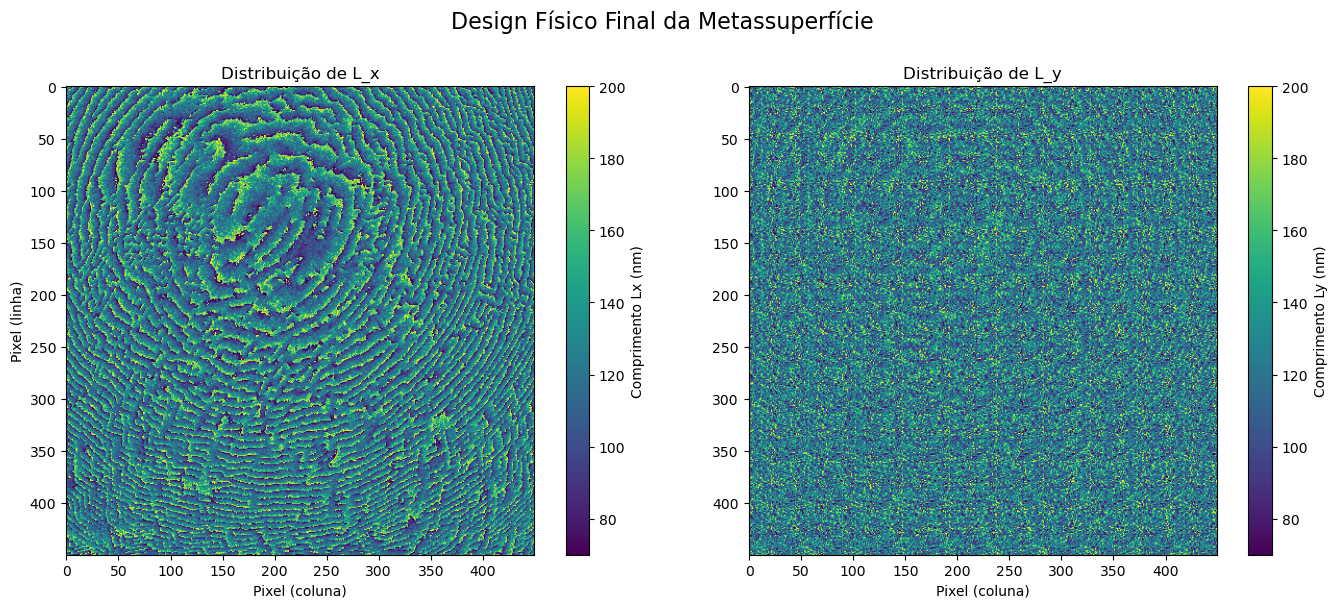

In [43]:
plt.figure(figsize=(14, 6))
plt.suptitle("Design Físico Final da Metassuperfície", fontsize=16)

# Plot do mapa de Lx
plt.subplot(1, 2, 1)
im1 = plt.imshow(layout_final_lx, cmap='viridis')
plt.title("Distribuição de L_x")
plt.xlabel("Pixel (coluna)")
plt.ylabel("Pixel (linha)")
plt.colorbar(im1, label="Comprimento Lx (nm)")

# Plot do mapa de Ly
plt.subplot(1, 2, 2)
im2 = plt.imshow(layout_final_ly, cmap='viridis')
plt.title("Distribuição de L_y")
plt.xlabel("Pixel (coluna)")
plt.colorbar(im2, label="Comprimento Ly (nm)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

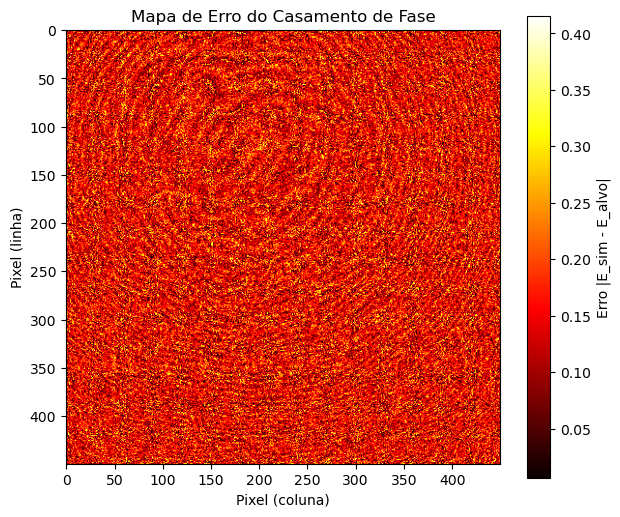

Erro médio final em toda a metassuperfície: 0.1517


In [44]:
plt.figure(figsize=(7, 6))
im_err = plt.imshow(mapa_de_erro_final, cmap='hot')
plt.title("Mapa de Erro do Casamento de Fase")
plt.xlabel("Pixel (coluna)")
plt.ylabel("Pixel (linha)")
plt.colorbar(im_err, label="Erro |E_sim - E_alvo|")
plt.show()

erro_medio = np.mean(mapa_de_erro_final)
print(f"Erro médio final em toda a metassuperfície: {erro_medio:.4f}")

Construindo o campo complexo da metassuperfície projetada...
Propagando o campo para reconstruir a imagem final...


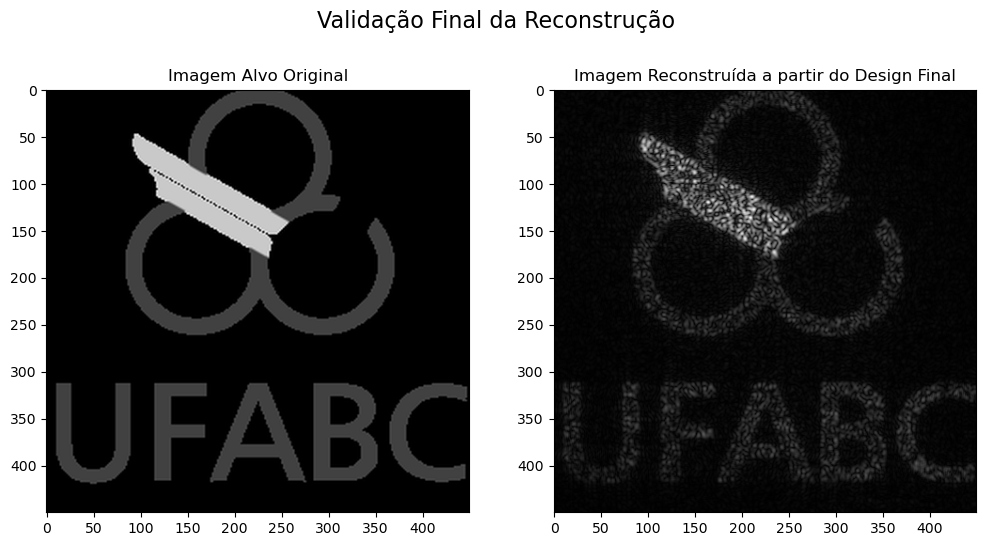

Correlação de Pearson Final: 0.8046


In [38]:
print("Construindo o campo complexo da metassuperfície projetada...")
lookup_table = df5.set_index(['L_x', 'L_y'])['S_complex_TM']

#Matriz para preencher com as propriedades ópticas dos layouts finais
final_phase_map = np.zeros_like(layout_final_lx, dtype=np.complex128)

for i in range(layout_final_lx.shape[0]):
    for j in range(layout_final_lx.shape[1]):
        lx = layout_final_lx[i, j]
        ly = layout_final_ly[i, j]
        final_phase_map[i, j] = lookup_table.loc[(lx, ly)]


print("Propagando o campo para reconstruir a imagem final...")
#Usamos a função do código GS para a reconstrução final
imagem_reconstruida_final = GSx.reconstruct_image(np.angle(final_phase_map), 
                                                  wavelength, z, dx, NA)

plt.figure(figsize=(12, 6))
plt.suptitle("Validação Final da Reconstrução", fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(target_image, cmap='gray')
plt.title("Imagem Alvo Original")

plt.subplot(1, 2, 2)
plt.imshow(imagem_reconstruida_final, cmap='gray')
plt.title("Imagem Reconstruída a partir do Design Final")

plt.show()

final_correlation = GSx.calculate_correlation(target_image, imagem_reconstruida_final)
print(f"Correlação de Pearson Final: {final_correlation:.4f}")

Carregando DataFrame 'df5.csv'...
Convertendo colunas de texto para números complexos...
Conversão concluída.

Preparando para calcular os mapas de erro...
Calculando os erros para cada pixel...


Calculando Mapas de Erro: 100%|██████████████████████████████████████████████████████| 450/450 [01:32<00:00,  4.88it/s]


Cálculos finalizados.
Gerando os gráficos de erro...


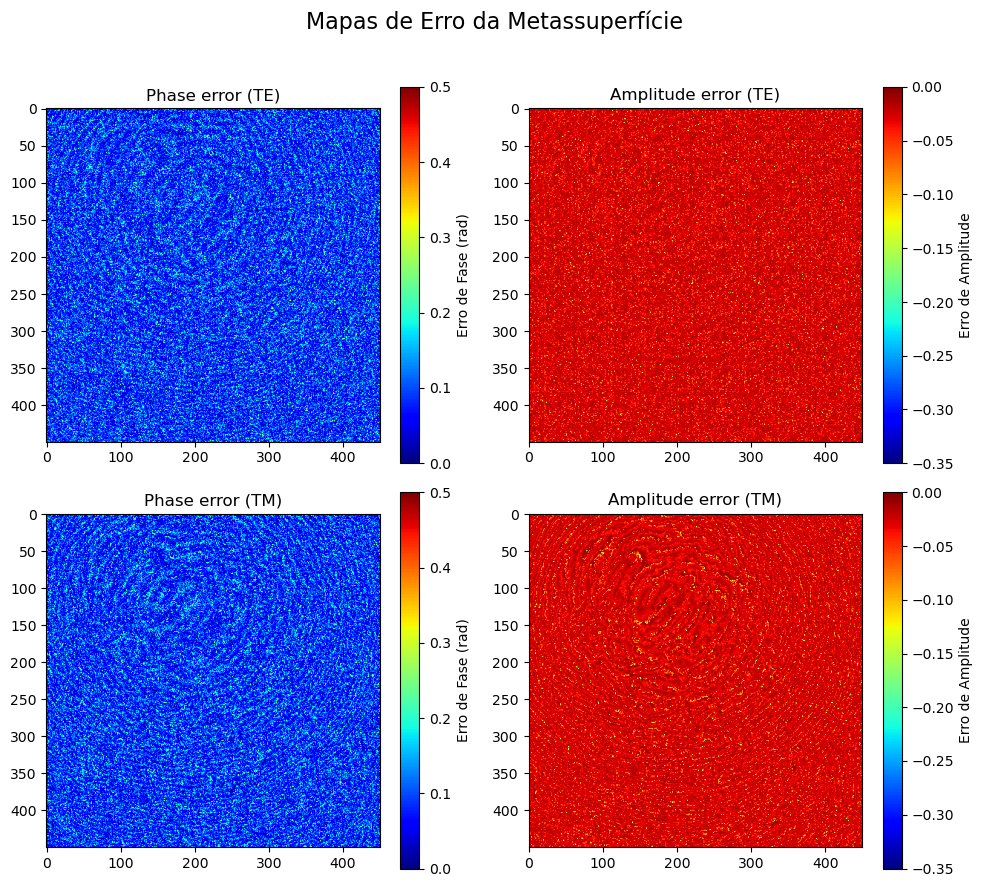


O erro médio de fase absoluto (TM - Holograma) foi: 0.0905 rad
O erro médio de fase absoluto (TE - Dammann) foi: 0.0909 rad
(Valor do artigo para comparação: Erro Fase ~0.094 rad)

O erro médio de amplitude absoluto (TM - Holograma) foi: 0.0288
O erro médio de amplitude absoluto (TE - Dammann) foi: 0.0287
(Valor do artigo para comparação: Erro Amplitude ~0.015 por pixel)


In [33]:


# --- ETAPA 0: CARREGAMENTO E PREPARAÇÃO DOS DADOS ---
# Supondo que você salvou sua biblioteca processada com o nome 'df5.csv'
print("Carregando DataFrame 'df5.csv'...")
df5 = pd.read_csv('df5.csv')

# --- CORREÇÃO IMPORTANTE AQUI ---
# Ao carregar de um CSV, os números complexos viram texto (string).
# Precisamos convertê-los de volta para o tipo 'complex'.
print("Convertendo colunas de texto para números complexos...")
df5['S_complex_TE'] = df5['S_complex_TE'].apply(complex)
df5['S_complex_TM'] = df5['S_complex_TM'].apply(complex)
print("Conversão concluída.")
# ------------------------------------

# Supondo que as seguintes variáveis já existem na memória do seu notebook:
# - layout_final_lx, layout_final_ly: As matrizes do seu design final.
# - phase_map_x, phase_map_y: As matrizes de fase alvo.
# 'df5' agora está carregado e corrigido.

print("\nPreparando para calcular os mapas de erro...")

# Crie uma lookup table otimizada para buscar as propriedades ópticas
lookup_table = df5.set_index(['L_x', 'L_y'])

# --- ETAPA 2: CALCULE OS MAPAS DE ERRO ---

altura, largura = layout_final_lx.shape

# Crie as 4 matrizes "em branco" para armazenar os erros
phase_error_te_map = np.zeros((altura, largura))
amp_error_te_map = np.zeros((altura, largura))
phase_error_tm_map = np.zeros((altura, largura))
amp_error_tm_map = np.zeros((altura, largura))

print("Calculando os erros para cada pixel...")
for i in tqdm(range(altura), desc="Calculando Mapas de Erro"):
    for j in range(largura):
        # 1. Pegue a geometria escolhida para o pixel (i,j)
        lx = layout_final_lx[i, j]
        ly = layout_final_ly[i, j]
        
        # 2. Busque as propriedades ópticas REAIS deste meta-átomo na biblioteca
        meta_atomo_escolhido = lookup_table.loc[(lx, ly)]
        # Agora S_te_real e S_tm_real serão do tipo 'complex', e os cálculos funcionarão
        S_te_real = meta_atomo_escolhido['S_complex_TE']
        S_tm_real = meta_atomo_escolhido['S_complex_TM']
        
        # 3. Pegue as propriedades ópticas ALVO para este pixel
        phase_te_alvo = phase_map_y[i, j]
        phase_tm_alvo = phase_map_x[i, j]
        
        # 4. Calcule os erros de FASE e AMPLITUDE para ambas as polarizações
        
        # Polarização TE (Dammann)
        phase_error_te_map[i, j] = np.angle(S_te_real / np.exp(1j * phase_te_alvo))
        amp_error_te_map[i, j] = np.abs(S_te_real) - 1.0 # Amplitude alvo é 1
        
        # Polarização TM (Holograma)
        phase_error_tm_map[i, j] = np.angle(S_tm_real / np.exp(1j * phase_tm_alvo))
        amp_error_tm_map[i, j] = np.abs(S_tm_real) - 1.0 # Amplitude alvo é 1
        
print("Cálculos finalizados.")

# --- ETAPA 3: PLOTE OS GRÁFICOS (REPLICANDO A FIGURA S3) ---

print("Gerando os gráficos de erro...")
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle("Mapas de Erro da Metassuperfície", fontsize=16)

# a) Erro de Fase (TE)
im_a = axes[0, 0].imshow(np.abs(phase_error_te_map), cmap='jet', vmin=0, vmax=0.5)
axes[0, 0].set_title("Phase error (TE)")
fig.colorbar(im_a, ax=axes[0, 0], label="Erro de Fase (rad)")

# b) Erro de Amplitude (TE)
im_b = axes[0, 1].imshow(amp_error_te_map, cmap='jet', vmin=-0.35, vmax=0)
axes[0, 1].set_title("Amplitude error (TE)")
fig.colorbar(im_b, ax=axes[0, 1], label="Erro de Amplitude")

# c) Erro de Fase (TM)
im_c = axes[1, 0].imshow(np.abs(phase_error_tm_map), cmap='jet', vmin=0, vmax=0.5)
axes[1, 0].set_title("Phase error (TM)")
fig.colorbar(im_c, ax=axes[1, 0], label="Erro de Fase (rad)")

# d) Erro de Amplitude (TM)
im_d = axes[1, 1].imshow(amp_error_tm_map, cmap='jet', vmin=-0.35, vmax=0)
axes[1, 1].set_title("Amplitude error (TM)")
fig.colorbar(im_d, ax=axes[1, 1], label="Erro de Amplitude")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- ETAPA 4: ANÁLISE QUANTITATIVA ---

# CÁLCULO DOS ERROS MÉDIOS
erro_medio_fase_abs_tm = np.mean(np.abs(phase_error_tm_map))
erro_medio_fase_abs_te = np.mean(np.abs(phase_error_te_map))

#Erro médio das amplitudes
erro_medio_amp_abs_tm = np.mean(np.abs(amp_error_tm_map))
erro_medio_amp_abs_te = np.mean(np.abs(amp_error_te_map))

#Resultados printados
print(f"\nO erro médio de fase absoluto (TM - Holograma) foi: {erro_medio_fase_abs_tm:.4f} rad")

print(f"O erro médio de fase absoluto (TE - Dammann) foi: {erro_medio_fase_abs_te:.4f} rad")

print(f"(Valor do artigo para comparação: Erro Fase ~0.094 rad)")

print(f"\nO erro médio de amplitude absoluto (TM - Holograma) foi: {erro_medio_amp_abs_tm:.4f}")

print(f"O erro médio de amplitude absoluto (TE - Dammann) foi: {erro_medio_amp_abs_te:.4f}")

print(f"(Valor do artigo para comparação: Erro Amplitude ~0.015 por pixel)")